# A-X vs I-X

### Load data

In [1]:
from src.preprocessing import *
from src.benchmarks import *
from src.models import *

print('...loading the dataset from mongodb...')
X_0, y_0 = load_data('bio_dataset', 'GM12878', 'A-X', 'I-X', 'epigenomic')
X_1, y_1 = load_data('bio_dataset', 'HelaS3', 'A-X', 'I-X', 'epigenomic')
X_2, y_2 = load_data('bio_dataset', 'HepG2', 'A-X', 'I-X', 'epigenomic')
X_3, y_3 = load_data('bio_dataset', 'K562', 'A-X', 'I-X', 'epigenomic')
print('...dataset loaded...')

Using TensorFlow backend.
W0627 16:36:33.256268 140265302181504 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
/usr/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


...loading the dataset from mongodb...
...dataset loaded...


### Split data between training, validation and test set

In [2]:
X_train = [[] for i in range(4)]
X_test = [[] for i in range(4)]
X_val = [[] for i in range(4)]
y_train = [[] for i in range(4)]
y_test = [[] for i in range(4)]
y_val = [[] for i in range(4)]

print('...splitting between training-set and test-set...')
print()

X_train[0], X_test[0], y_train[0], y_test[0] = splitting(X_0, y_0, 0.2)
X_train[0], X_val[0], y_train[0], y_val[0] = splitting(X_train[0], y_train[0], 0.2)

print(f'[GM12878] # samples in training-set: {len(X_train[0])}')
print(f'[GM12878] # samples in test-set: {len(X_test[0])}')
print(f'[GM12878] # samples in validation-set: {len(X_val[0])}')
print()

X_train[1], X_test[1], y_train[1], y_test[1] = splitting(X_1, y_1, 0.2)
X_train[1], X_val[1], y_train[1], y_val[1] = splitting(X_train[1], y_train[1], 0.2)

print(f'[HelaS3] # samples in training-set: {len(X_train[1])}')
print(f'[HelaS3] # samples in test-set: {len(X_test[1])}')
print(f'[HelaS3] # samples in validation-set: {len(X_val[1])}')
print()

X_train[2], X_test[2], y_train[2], y_test[2] = splitting(X_2, y_2, 0.2)
X_train[2], X_val[2], y_train[2], y_val[2] = splitting(X_train[2], y_train[2], 0.2)

print(f'[HepG2] # samples in training-set: {len(X_train[2])}')
print(f'[HepG2] # samples in test-set: {len(X_test[2])}')
print(f'[HepG2] # samples in validation-set: {len(X_val[2])}')
print()

X_train[3], X_test[3], y_train[3], y_test[3] = splitting(X_3, y_3, 0.2)
X_train[3], X_val[3], y_train[3], y_val[3] = splitting(X_train[3], y_train[3], 0.2)

print(f'[K562] # samples in training-set: {len(X_train[3])}')
print(f'[K562] # samples in test-set: {len(X_test[3])}')
print(f'[K562] # samples in validation-set: {len(X_val[3])}')

...splitting between training-set and test-set...

[GM12878] # samples in training-set: 17474
[GM12878] # samples in test-set: 5461
[GM12878] # samples in validation-set: 4369

[HelaS3] # samples in training-set: 19964
[HelaS3] # samples in test-set: 6239
[HelaS3] # samples in validation-set: 4991

[HepG2] # samples in training-set: 18560
[HepG2] # samples in test-set: 5801
[HepG2] # samples in validation-set: 4641

[K562] # samples in training-set: 18748
[K562] # samples in test-set: 5859
[K562] # samples in validation-set: 4687


### Balance data

In [3]:
X_train_adasyn = [[] for i in range(4)]
y_train_adasyn = [[] for i in range(4)]
X_train_smoteenn = [[] for i in range(4)]
y_train_smoteenn = [[] for i in range(4)]

print('...oversampling training-set with ADASYN...')

X_train_adasyn[0], y_train_adasyn[0] = oversampling_adasyn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_adasyn[0])} (active: {(y_train_adasyn[0] == 1).sum()}, inactive: {(y_train_adasyn[0] == 0).sum()})')

X_train_adasyn[1], y_train_adasyn[1] = oversampling_adasyn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_adasyn[1])} (active: {(y_train_adasyn[1] == 1).sum()}, inactive: {(y_train_adasyn[1] == 0).sum()})')

X_train_adasyn[2], y_train_adasyn[2] = oversampling_adasyn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_adasyn[2])} (active: {(y_train_adasyn[2] == 1).sum()}, inactive: {(y_train_adasyn[2] == 0).sum()})')

X_train_adasyn[3], y_train_adasyn[3] = oversampling_adasyn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_adasyn[3])} (active: {(y_train_adasyn[3] == 1).sum()}, inactive: {(y_train_adasyn[3] == 0).sum()})')

print()
print('...oversampling training-set with SMOTEENN...')

X_train_smoteenn[0], y_train_smoteenn[0] = sampling_smoteenn(X_train[0], y_train[0])
print(f'[GM12878] # samples: {len(X_train_smoteenn[0])} (active: {(y_train_smoteenn[0] == 1).sum()}, inactive: {(y_train_smoteenn[0] == 0).sum()})')

X_train_smoteenn[1], y_train_smoteenn[1] = sampling_smoteenn(X_train[1], y_train[1])
print(f'[HelaS3] # samples: {len(X_train_smoteenn[1])} (active: {(y_train_smoteenn[1] == 1).sum()}, inactive: {(y_train_smoteenn[1] == 0).sum()})')

X_train_smoteenn[2], y_train_smoteenn[2] = sampling_smoteenn(X_train[2], y_train[2])
print(f'[HepG2] # samples: {len(X_train_smoteenn[2])} (active: {(y_train_smoteenn[2] == 1).sum()}, inactive: {(y_train_smoteenn[2] == 0).sum()})')

X_train_smoteenn[3], y_train_smoteenn[3] = sampling_smoteenn(X_train[3], y_train[3])
print(f'[K562] # samples: {len(X_train_smoteenn[3])} (active: {(y_train_smoteenn[3] == 1).sum()}, inactive: {(y_train_smoteenn[3] == 0).sum()})')

...oversampling training-set with ADASYN...
[GM12878] # samples: 24579 (active: 12425, inactive: 12154)
[HelaS3] # samples: 28699 (active: 14543, inactive: 14156)
[HepG2] # samples: 24082 (active: 11915, inactive: 12167)
[K562] # samples: 25256 (active: 12301, inactive: 12955)

...oversampling training-set with SMOTEENN...
[GM12878] # samples: 19267 (active: 11610, inactive: 7657)
[HelaS3] # samples: 23389 (active: 13713, inactive: 9676)
[HepG2] # samples: 20566 (active: 11324, inactive: 9242)
[K562] # samples: 17780 (active: 12527, inactive: 5253)


## Benchmarks with the first MLP (2 layers, (256, 256))

In [4]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense1(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

W0627 16:46:29.310115 140265302181504 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 16:46:29.321466 140265302181504 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:46:29.323529 140265302181504 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 16:46:29.334885 140265302181504 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0627 16:46:29.345377 140265302181504 deprecat

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               26112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 92,161
Trainable params: 92,161
Non-trainable params: 0
_________________________________________________________________
None
Train on 24579 samples, validate on 4369 samples
Epoch 1/150
24579/24579 [==============================] - 1s 36us/step - loss: 0.4569 - acc: 0.8099 - auc_acc: 0.8193 - f1_acc: 0.8118 - precision_acc: 0.8346 - recall_acc: 0.7974 - val_loss: 

24579/24579 [==============================] - 1s 27us/step - loss: 0.1786 - acc: 0.9325 - auc_acc: 0.9720 - f1_acc: 0.9341 - precision_acc: 0.9150 - recall_acc: 0.9550 - val_loss: 0.1980 - val_acc: 0.9258 - val_auc_acc: 0.9721 - val_f1_acc: 0.8827 - val_precision_acc: 0.8211 - val_recall_acc: 0.9568
Epoch 51/150
24579/24579 [==============================] - 1s 25us/step - loss: 0.1762 - acc: 0.9343 - auc_acc: 0.9722 - f1_acc: 0.9358 - precision_acc: 0.9164 - recall_acc: 0.9573 - val_loss: 0.1913 - val_acc: 0.9290 - val_auc_acc: 0.9722 - val_f1_acc: 0.8872 - val_precision_acc: 0.8303 - val_recall_acc: 0.9546
Epoch 52/150
24579/24579 [==============================] - 1s 28us/step - loss: 0.1754 - acc: 0.9349 - auc_acc: 0.9723 - f1_acc: 0.9366 - precision_acc: 0.9169 - recall_acc: 0.9580 - val_loss: 0.1829 - val_acc: 0.9306 - val_auc_acc: 0.9724 - val_f1_acc: 0.8880 - val_precision_acc: 0.8426 - val_recall_acc: 0.9409
Epoch 53/150
24579/24579 [==============================] - 1s 28us/

24579/24579 [==============================] - 1s 26us/step - loss: 0.1371 - acc: 0.9469 - auc_acc: 0.9778 - f1_acc: 0.9487 - precision_acc: 0.9266 - recall_acc: 0.9726 - val_loss: 0.2005 - val_acc: 0.9284 - val_auc_acc: 0.9778 - val_f1_acc: 0.8852 - val_precision_acc: 0.8329 - val_recall_acc: 0.9468
Epoch 103/150
24579/24579 [==============================] - 1s 28us/step - loss: 0.1387 - acc: 0.9481 - auc_acc: 0.9778 - f1_acc: 0.9495 - precision_acc: 0.9278 - recall_acc: 0.9730 - val_loss: 0.1942 - val_acc: 0.9300 - val_auc_acc: 0.9779 - val_f1_acc: 0.8862 - val_precision_acc: 0.8447 - val_recall_acc: 0.9344
Epoch 104/150
24579/24579 [==============================] - 1s 24us/step - loss: 0.1356 - acc: 0.9493 - auc_acc: 0.9779 - f1_acc: 0.9507 - precision_acc: 0.9290 - recall_acc: 0.9744 - val_loss: 0.1874 - val_acc: 0.9325 - val_auc_acc: 0.9780 - val_f1_acc: 0.8905 - val_precision_acc: 0.8501 - val_recall_acc: 0.9371
Epoch 105/150
24579/24579 [==============================] - 1s 26

Epoch 128/150
24579/24579 [==============================] - 1s 29us/step - loss: 0.1233 - acc: 0.9536 - auc_acc: 0.9796 - f1_acc: 0.9549 - precision_acc: 0.9343 - recall_acc: 0.9770 - val_loss: 0.1988 - val_acc: 0.9311 - val_auc_acc: 0.9797 - val_f1_acc: 0.8875 - val_precision_acc: 0.8498 - val_recall_acc: 0.9306
Epoch 129/150
24579/24579 [==============================] - 1s 28us/step - loss: 0.1234 - acc: 0.9532 - auc_acc: 0.9797 - f1_acc: 0.9542 - precision_acc: 0.9339 - recall_acc: 0.9763 - val_loss: 0.1968 - val_acc: 0.9318 - val_auc_acc: 0.9797 - val_f1_acc: 0.8890 - val_precision_acc: 0.8477 - val_recall_acc: 0.9369
Epoch 130/150
24579/24579 [==============================] - 1s 30us/step - loss: 0.1220 - acc: 0.9530 - auc_acc: 0.9798 - f1_acc: 0.9541 - precision_acc: 0.9334 - recall_acc: 0.9763 - val_loss: 0.1986 - val_acc: 0.9322 - val_auc_acc: 0.9798 - val_f1_acc: 0.8894 - val_precision_acc: 0.8518 - val_recall_acc: 0.9327
Epoch 131/150
24579/24579 [=========================

28699/28699 [==============================] - 1s 40us/step - loss: 0.4860 - acc: 0.8249 - auc_acc: 0.8344 - f1_acc: 0.8336 - precision_acc: 0.8223 - recall_acc: 0.8544 - val_loss: 0.5208 - val_acc: 0.9080 - val_auc_acc: 0.9015 - val_f1_acc: 0.8259 - val_precision_acc: 0.9082 - val_recall_acc: 0.7610
Epoch 2/150
28699/28699 [==============================] - 1s 28us/step - loss: 0.3369 - acc: 0.9025 - auc_acc: 0.9174 - f1_acc: 0.9027 - precision_acc: 0.9088 - recall_acc: 0.8994 - val_loss: 0.2885 - val_acc: 0.9387 - val_auc_acc: 0.9311 - val_f1_acc: 0.9008 - val_precision_acc: 0.8433 - val_recall_acc: 0.9694
Epoch 3/150
28699/28699 [==============================] - 1s 26us/step - loss: 0.2841 - acc: 0.9164 - auc_acc: 0.9385 - f1_acc: 0.9165 - precision_acc: 0.9230 - recall_acc: 0.9118 - val_loss: 0.2849 - val_acc: 0.9407 - val_auc_acc: 0.9443 - val_f1_acc: 0.9042 - val_precision_acc: 0.8450 - val_recall_acc: 0.9747
Epoch 4/150
28699/28699 [==============================] - 1s 25us/ste

28699/28699 [==============================] - 1s 29us/step - loss: 0.1363 - acc: 0.9549 - auc_acc: 0.9811 - f1_acc: 0.9552 - precision_acc: 0.9529 - recall_acc: 0.9581 - val_loss: 0.1331 - val_acc: 0.9563 - val_auc_acc: 0.9812 - val_f1_acc: 0.9270 - val_precision_acc: 0.8876 - val_recall_acc: 0.9717
Epoch 54/150
28699/28699 [==============================] - 1s 27us/step - loss: 0.1340 - acc: 0.9532 - auc_acc: 0.9812 - f1_acc: 0.9537 - precision_acc: 0.9512 - recall_acc: 0.9567 - val_loss: 0.1361 - val_acc: 0.9557 - val_auc_acc: 0.9813 - val_f1_acc: 0.9264 - val_precision_acc: 0.8850 - val_recall_acc: 0.9739
Epoch 55/150
28699/28699 [==============================] - 1s 27us/step - loss: 0.1362 - acc: 0.9546 - auc_acc: 0.9814 - f1_acc: 0.9551 - precision_acc: 0.9529 - recall_acc: 0.9581 - val_loss: 0.1283 - val_acc: 0.9585 - val_auc_acc: 0.9814 - val_f1_acc: 0.9306 - val_precision_acc: 0.8937 - val_recall_acc: 0.9724
Epoch 56/150
28699/28699 [==============================] - 1s 27us/

28699/28699 [==============================] - 1s 27us/step - loss: 0.1068 - acc: 0.9649 - auc_acc: 0.9851 - f1_acc: 0.9653 - precision_acc: 0.9598 - recall_acc: 0.9714 - val_loss: 0.1255 - val_acc: 0.9581 - val_auc_acc: 0.9851 - val_f1_acc: 0.9299 - val_precision_acc: 0.8933 - val_recall_acc: 0.9712
Epoch 106/150
28699/28699 [==============================] - 1s 27us/step - loss: 0.1066 - acc: 0.9642 - auc_acc: 0.9851 - f1_acc: 0.9645 - precision_acc: 0.9578 - recall_acc: 0.9719 - val_loss: 0.1249 - val_acc: 0.9579 - val_auc_acc: 0.9852 - val_f1_acc: 0.9286 - val_precision_acc: 0.9005 - val_recall_acc: 0.9602
Epoch 107/150
28699/28699 [==============================] - 1s 28us/step - loss: 0.1075 - acc: 0.9639 - auc_acc: 0.9852 - f1_acc: 0.9643 - precision_acc: 0.9584 - recall_acc: 0.9708 - val_loss: 0.1243 - val_acc: 0.9583 - val_auc_acc: 0.9852 - val_f1_acc: 0.9303 - val_precision_acc: 0.8940 - val_recall_acc: 0.9712
Epoch 108/150
28699/28699 [==============================] - 1s 30

Epoch 131/150
28699/28699 [==============================] - 1s 29us/step - loss: 0.0941 - acc: 0.9695 - auc_acc: 0.9864 - f1_acc: 0.9699 - precision_acc: 0.9622 - recall_acc: 0.9782 - val_loss: 0.1228 - val_acc: 0.9605 - val_auc_acc: 0.9864 - val_f1_acc: 0.9338 - val_precision_acc: 0.8997 - val_recall_acc: 0.9720
Epoch 132/150
28699/28699 [==============================] - 1s 28us/step - loss: 0.0968 - acc: 0.9687 - auc_acc: 0.9864 - f1_acc: 0.9691 - precision_acc: 0.9611 - recall_acc: 0.9779 - val_loss: 0.1192 - val_acc: 0.9619 - val_auc_acc: 0.9865 - val_f1_acc: 0.9358 - val_precision_acc: 0.9046 - val_recall_acc: 0.9704
Epoch 133/150
28699/28699 [==============================] - 1s 27us/step - loss: 0.0945 - acc: 0.9689 - auc_acc: 0.9865 - f1_acc: 0.9693 - precision_acc: 0.9612 - recall_acc: 0.9779 - val_loss: 0.1254 - val_acc: 0.9597 - val_auc_acc: 0.9865 - val_f1_acc: 0.9326 - val_precision_acc: 0.8958 - val_recall_acc: 0.9740
Epoch 134/150
28699/28699 [=========================

Epoch 4/150
24082/24082 [==============================] - 1s 27us/step - loss: 0.2657 - acc: 0.9051 - auc_acc: 0.9522 - f1_acc: 0.9020 - precision_acc: 0.9126 - recall_acc: 0.8932 - val_loss: 0.2213 - val_acc: 0.9287 - val_auc_acc: 0.9541 - val_f1_acc: 0.9016 - val_precision_acc: 0.8517 - val_recall_acc: 0.9598
Epoch 5/150
24082/24082 [==============================] - 1s 27us/step - loss: 0.2567 - acc: 0.9109 - auc_acc: 0.9555 - f1_acc: 0.9100 - precision_acc: 0.9012 - recall_acc: 0.9203 - val_loss: 0.2133 - val_acc: 0.9300 - val_auc_acc: 0.9569 - val_f1_acc: 0.9035 - val_precision_acc: 0.8531 - val_recall_acc: 0.9624
Epoch 6/150
24082/24082 [==============================] - 1s 29us/step - loss: 0.2498 - acc: 0.9120 - auc_acc: 0.9579 - f1_acc: 0.9118 - precision_acc: 0.9001 - recall_acc: 0.9251 - val_loss: 0.2036 - val_acc: 0.9310 - val_auc_acc: 0.9590 - val_f1_acc: 0.9050 - val_precision_acc: 0.8541 - val_recall_acc: 0.9642
Epoch 7/150
24082/24082 [==============================] -

24082/24082 [==============================] - 1s 26us/step - loss: 0.1963 - acc: 0.9260 - auc_acc: 0.9700 - f1_acc: 0.9270 - precision_acc: 0.9001 - recall_acc: 0.9566 - val_loss: 0.1847 - val_acc: 0.9270 - val_auc_acc: 0.9701 - val_f1_acc: 0.9004 - val_precision_acc: 0.8418 - val_recall_acc: 0.9698
Epoch 31/150
24082/24082 [==============================] - 1s 29us/step - loss: 0.1957 - acc: 0.9258 - auc_acc: 0.9702 - f1_acc: 0.9267 - precision_acc: 0.9004 - recall_acc: 0.9558 - val_loss: 0.1834 - val_acc: 0.9270 - val_auc_acc: 0.9703 - val_f1_acc: 0.9006 - val_precision_acc: 0.8416 - val_recall_acc: 0.9704
Epoch 32/150
24082/24082 [==============================] - 1s 27us/step - loss: 0.1957 - acc: 0.9255 - auc_acc: 0.9704 - f1_acc: 0.9264 - precision_acc: 0.9010 - recall_acc: 0.9544 - val_loss: 0.1848 - val_acc: 0.9265 - val_auc_acc: 0.9705 - val_f1_acc: 0.8999 - val_precision_acc: 0.8409 - val_recall_acc: 0.9698
Epoch 33/150
24082/24082 [==============================] - 1s 29us/

24082/24082 [==============================] - 1s 30us/step - loss: 0.1635 - acc: 0.9357 - auc_acc: 0.9755 - f1_acc: 0.9362 - precision_acc: 0.9162 - recall_acc: 0.9582 - val_loss: 0.1800 - val_acc: 0.9321 - val_auc_acc: 0.9755 - val_f1_acc: 0.9063 - val_precision_acc: 0.8576 - val_recall_acc: 0.9626
Epoch 83/150
24082/24082 [==============================] - 1s 28us/step - loss: 0.1639 - acc: 0.9352 - auc_acc: 0.9756 - f1_acc: 0.9355 - precision_acc: 0.9155 - recall_acc: 0.9577 - val_loss: 0.1821 - val_acc: 0.9317 - val_auc_acc: 0.9756 - val_f1_acc: 0.9057 - val_precision_acc: 0.8564 - val_recall_acc: 0.9632
Epoch 84/150
24082/24082 [==============================] - 1s 28us/step - loss: 0.1615 - acc: 0.9374 - auc_acc: 0.9757 - f1_acc: 0.9378 - precision_acc: 0.9171 - recall_acc: 0.9606 - val_loss: 0.1839 - val_acc: 0.9287 - val_auc_acc: 0.9757 - val_f1_acc: 0.9022 - val_precision_acc: 0.8485 - val_recall_acc: 0.9650
Epoch 85/150
24082/24082 [==============================] - 1s 26us/

24082/24082 [==============================] - 1s 28us/step - loss: 0.1525 - acc: 0.9391 - auc_acc: 0.9772 - f1_acc: 0.9395 - precision_acc: 0.9197 - recall_acc: 0.9611 - val_loss: 0.1892 - val_acc: 0.9304 - val_auc_acc: 0.9772 - val_f1_acc: 0.9043 - val_precision_acc: 0.8528 - val_recall_acc: 0.9644
Epoch 109/150
24082/24082 [==============================] - 1s 31us/step - loss: 0.1522 - acc: 0.9403 - auc_acc: 0.9772 - f1_acc: 0.9408 - precision_acc: 0.9211 - recall_acc: 0.9621 - val_loss: 0.1866 - val_acc: 0.9321 - val_auc_acc: 0.9773 - val_f1_acc: 0.9061 - val_precision_acc: 0.8594 - val_recall_acc: 0.9601
Epoch 110/150
24082/24082 [==============================] - 1s 29us/step - loss: 0.1519 - acc: 0.9399 - auc_acc: 0.9773 - f1_acc: 0.9401 - precision_acc: 0.9216 - recall_acc: 0.9604 - val_loss: 0.1844 - val_acc: 0.9341 - val_auc_acc: 0.9773 - val_f1_acc: 0.9083 - val_precision_acc: 0.8640 - val_recall_acc: 0.9593
Epoch 111/150
24082/24082 [==============================] - 1s 31

Epoch 134/150
24082/24082 [==============================] - 1s 28us/step - loss: 0.1403 - acc: 0.9441 - auc_acc: 0.9786 - f1_acc: 0.9444 - precision_acc: 0.9265 - recall_acc: 0.9638 - val_loss: 0.1874 - val_acc: 0.9328 - val_auc_acc: 0.9786 - val_f1_acc: 0.9062 - val_precision_acc: 0.8655 - val_recall_acc: 0.9526
Epoch 135/150
24082/24082 [==============================] - 1s 27us/step - loss: 0.1403 - acc: 0.9452 - auc_acc: 0.9786 - f1_acc: 0.9454 - precision_acc: 0.9275 - recall_acc: 0.9650 - val_loss: 0.1891 - val_acc: 0.9341 - val_auc_acc: 0.9786 - val_f1_acc: 0.9079 - val_precision_acc: 0.8668 - val_recall_acc: 0.9550
Epoch 136/150
24082/24082 [==============================] - 1s 26us/step - loss: 0.1408 - acc: 0.9442 - auc_acc: 0.9787 - f1_acc: 0.9443 - precision_acc: 0.9252 - recall_acc: 0.9651 - val_loss: 0.1926 - val_acc: 0.9339 - val_auc_acc: 0.9787 - val_f1_acc: 0.9081 - val_precision_acc: 0.8649 - val_recall_acc: 0.9578
Epoch 137/150
24082/24082 [=========================

Epoch 7/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.2283 - acc: 0.9207 - auc_acc: 0.9549 - f1_acc: 0.9190 - precision_acc: 0.9103 - recall_acc: 0.9293 - val_loss: 0.2000 - val_acc: 0.9279 - val_auc_acc: 0.9564 - val_f1_acc: 0.8893 - val_precision_acc: 0.8297 - val_recall_acc: 0.9601
Epoch 8/150
25256/25256 [==============================] - 1s 31us/step - loss: 0.2228 - acc: 0.9204 - auc_acc: 0.9576 - f1_acc: 0.9189 - precision_acc: 0.9069 - recall_acc: 0.9327 - val_loss: 0.1840 - val_acc: 0.9292 - val_auc_acc: 0.9587 - val_f1_acc: 0.8894 - val_precision_acc: 0.8384 - val_recall_acc: 0.9488
Epoch 9/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.2133 - acc: 0.9230 - auc_acc: 0.9597 - f1_acc: 0.9217 - precision_acc: 0.9103 - recall_acc: 0.9346 - val_loss: 0.1868 - val_acc: 0.9287 - val_auc_acc: 0.9606 - val_f1_acc: 0.8902 - val_precision_acc: 0.8322 - val_recall_acc: 0.9586
Epoch 10/150
25256/25256 [==============================] 

25256/25256 [==============================] - 1s 31us/step - loss: 0.1646 - acc: 0.9414 - auc_acc: 0.9746 - f1_acc: 0.9407 - precision_acc: 0.9243 - recall_acc: 0.9588 - val_loss: 0.1888 - val_acc: 0.9275 - val_auc_acc: 0.9747 - val_f1_acc: 0.8898 - val_precision_acc: 0.8243 - val_recall_acc: 0.9691
Epoch 34/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.1632 - acc: 0.9411 - auc_acc: 0.9748 - f1_acc: 0.9401 - precision_acc: 0.9248 - recall_acc: 0.9571 - val_loss: 0.1870 - val_acc: 0.9298 - val_auc_acc: 0.9749 - val_f1_acc: 0.8925 - val_precision_acc: 0.8297 - val_recall_acc: 0.9682
Epoch 35/150
25256/25256 [==============================] - 1s 28us/step - loss: 0.1608 - acc: 0.9411 - auc_acc: 0.9750 - f1_acc: 0.9404 - precision_acc: 0.9232 - recall_acc: 0.9591 - val_loss: 0.1866 - val_acc: 0.9315 - val_auc_acc: 0.9751 - val_f1_acc: 0.8948 - val_precision_acc: 0.8344 - val_recall_acc: 0.9670
Epoch 36/150
25256/25256 [==============================] - 1s 32us/

25256/25256 [==============================] - 1s 32us/step - loss: 0.1210 - acc: 0.9561 - auc_acc: 0.9816 - f1_acc: 0.9553 - precision_acc: 0.9394 - recall_acc: 0.9725 - val_loss: 0.1768 - val_acc: 0.9362 - val_auc_acc: 0.9816 - val_f1_acc: 0.9002 - val_precision_acc: 0.8513 - val_recall_acc: 0.9571
Epoch 86/150
25256/25256 [==============================] - 1s 31us/step - loss: 0.1220 - acc: 0.9553 - auc_acc: 0.9816 - f1_acc: 0.9544 - precision_acc: 0.9394 - recall_acc: 0.9708 - val_loss: 0.1668 - val_acc: 0.9405 - val_auc_acc: 0.9817 - val_f1_acc: 0.9047 - val_precision_acc: 0.8707 - val_recall_acc: 0.9432
Epoch 87/150
25256/25256 [==============================] - 1s 31us/step - loss: 0.1199 - acc: 0.9561 - auc_acc: 0.9817 - f1_acc: 0.9553 - precision_acc: 0.9401 - recall_acc: 0.9718 - val_loss: 0.1712 - val_acc: 0.9368 - val_auc_acc: 0.9818 - val_f1_acc: 0.9000 - val_precision_acc: 0.8563 - val_recall_acc: 0.9500
Epoch 88/150
25256/25256 [==============================] - 1s 26us/

25256/25256 [==============================] - 1s 30us/step - loss: 0.1045 - acc: 0.9637 - auc_acc: 0.9836 - f1_acc: 0.9630 - precision_acc: 0.9473 - recall_acc: 0.9798 - val_loss: 0.1828 - val_acc: 0.9364 - val_auc_acc: 0.9836 - val_f1_acc: 0.8999 - val_precision_acc: 0.8534 - val_recall_acc: 0.9534
Epoch 112/150
25256/25256 [==============================] - 1s 28us/step - loss: 0.1037 - acc: 0.9629 - auc_acc: 0.9836 - f1_acc: 0.9619 - precision_acc: 0.9473 - recall_acc: 0.9777 - val_loss: 0.1871 - val_acc: 0.9383 - val_auc_acc: 0.9837 - val_f1_acc: 0.8997 - val_precision_acc: 0.8810 - val_recall_acc: 0.9210
Epoch 113/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.1030 - acc: 0.9637 - auc_acc: 0.9837 - f1_acc: 0.9631 - precision_acc: 0.9491 - recall_acc: 0.9782 - val_loss: 0.1861 - val_acc: 0.9356 - val_auc_acc: 0.9837 - val_f1_acc: 0.8995 - val_precision_acc: 0.8498 - val_recall_acc: 0.9572
Epoch 114/150
25256/25256 [==============================] - 1s 27

Epoch 137/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.0865 - acc: 0.9700 - auc_acc: 0.9852 - f1_acc: 0.9694 - precision_acc: 0.9565 - recall_acc: 0.9831 - val_loss: 0.1841 - val_acc: 0.9400 - val_auc_acc: 0.9852 - val_f1_acc: 0.9047 - val_precision_acc: 0.8700 - val_recall_acc: 0.9441
Epoch 138/150
25256/25256 [==============================] - 1s 30us/step - loss: 0.0892 - acc: 0.9683 - auc_acc: 0.9853 - f1_acc: 0.9676 - precision_acc: 0.9546 - recall_acc: 0.9814 - val_loss: 0.1934 - val_acc: 0.9392 - val_auc_acc: 0.9853 - val_f1_acc: 0.9041 - val_precision_acc: 0.8612 - val_recall_acc: 0.9534
Epoch 139/150
25256/25256 [==============================] - 1s 29us/step - loss: 0.0866 - acc: 0.9692 - auc_acc: 0.9853 - f1_acc: 0.9685 - precision_acc: 0.9561 - recall_acc: 0.9818 - val_loss: 0.1819 - val_acc: 0.9405 - val_auc_acc: 0.9853 - val_f1_acc: 0.9052 - val_precision_acc: 0.8692 - val_recall_acc: 0.9458
Epoch 140/150
25256/25256 [=========================

19267/19267 [==============================] - 0s 22us/step - loss: 0.0655 - acc: 0.9773 - auc_acc: 0.9875 - f1_acc: 0.9807 - precision_acc: 0.9921 - recall_acc: 0.9698 - val_loss: 0.3878 - val_acc: 0.9119 - val_auc_acc: 0.9877 - val_f1_acc: 0.8620 - val_precision_acc: 0.7948 - val_recall_acc: 0.9442
Epoch 11/150
19267/19267 [==============================] - 0s 20us/step - loss: 0.0630 - acc: 0.9773 - auc_acc: 0.9878 - f1_acc: 0.9809 - precision_acc: 0.9932 - recall_acc: 0.9691 - val_loss: 0.3686 - val_acc: 0.9162 - val_auc_acc: 0.9880 - val_f1_acc: 0.8676 - val_precision_acc: 0.8064 - val_recall_acc: 0.9410
Epoch 12/150
19267/19267 [==============================] - 0s 21us/step - loss: 0.0610 - acc: 0.9773 - auc_acc: 0.9881 - f1_acc: 0.9809 - precision_acc: 0.9919 - recall_acc: 0.9703 - val_loss: 0.3777 - val_acc: 0.9162 - val_auc_acc: 0.9883 - val_f1_acc: 0.8677 - val_precision_acc: 0.8052 - val_recall_acc: 0.9427
Epoch 13/150
19267/19267 [==============================] - 0s 20us/

19267/19267 [==============================] - 0s 21us/step - loss: 0.0396 - acc: 0.9844 - auc_acc: 0.9915 - f1_acc: 0.9868 - precision_acc: 0.9905 - recall_acc: 0.9833 - val_loss: 0.4009 - val_acc: 0.9238 - val_auc_acc: 0.9915 - val_f1_acc: 0.8800 - val_precision_acc: 0.8178 - val_recall_acc: 0.9554
Epoch 63/150
19267/19267 [==============================] - 0s 21us/step - loss: 0.0376 - acc: 0.9848 - auc_acc: 0.9915 - f1_acc: 0.9872 - precision_acc: 0.9915 - recall_acc: 0.9831 - val_loss: 0.4285 - val_acc: 0.9190 - val_auc_acc: 0.9915 - val_f1_acc: 0.8742 - val_precision_acc: 0.8056 - val_recall_acc: 0.9586
Epoch 64/150
19267/19267 [==============================] - 0s 21us/step - loss: 0.0386 - acc: 0.9847 - auc_acc: 0.9915 - f1_acc: 0.9873 - precision_acc: 0.9910 - recall_acc: 0.9837 - val_loss: 0.4202 - val_acc: 0.9210 - val_auc_acc: 0.9916 - val_f1_acc: 0.8767 - val_precision_acc: 0.8105 - val_recall_acc: 0.9578
Epoch 65/150
19267/19267 [==============================] - 0s 22us/

19267/19267 [==============================] - 0s 22us/step - loss: 0.0311 - acc: 0.9864 - auc_acc: 0.9921 - f1_acc: 0.9887 - precision_acc: 0.9908 - recall_acc: 0.9867 - val_loss: 0.4482 - val_acc: 0.9192 - val_auc_acc: 0.9921 - val_f1_acc: 0.8745 - val_precision_acc: 0.8055 - val_recall_acc: 0.9594
Epoch 115/150
19267/19267 [==============================] - 0s 20us/step - loss: 0.0310 - acc: 0.9872 - auc_acc: 0.9921 - f1_acc: 0.9893 - precision_acc: 0.9915 - recall_acc: 0.9872 - val_loss: 0.4389 - val_acc: 0.9197 - val_auc_acc: 0.9921 - val_f1_acc: 0.8748 - val_precision_acc: 0.8077 - val_recall_acc: 0.9570
Epoch 116/150
19267/19267 [==============================] - 0s 20us/step - loss: 0.0303 - acc: 0.9868 - auc_acc: 0.9921 - f1_acc: 0.9890 - precision_acc: 0.9909 - recall_acc: 0.9871 - val_loss: 0.4494 - val_acc: 0.9183 - val_auc_acc: 0.9921 - val_f1_acc: 0.8730 - val_precision_acc: 0.8040 - val_recall_acc: 0.9577
Epoch 117/150
19267/19267 [==============================] - 0s 21

Epoch 140/150
19267/19267 [==============================] - 0s 24us/step - loss: 0.0283 - acc: 0.9877 - auc_acc: 0.9922 - f1_acc: 0.9896 - precision_acc: 0.9914 - recall_acc: 0.9880 - val_loss: 0.4501 - val_acc: 0.9213 - val_auc_acc: 0.9922 - val_f1_acc: 0.8769 - val_precision_acc: 0.8112 - val_recall_acc: 0.9572
Epoch 141/150
19267/19267 [==============================] - 1s 26us/step - loss: 0.0287 - acc: 0.9875 - auc_acc: 0.9922 - f1_acc: 0.9895 - precision_acc: 0.9916 - recall_acc: 0.9875 - val_loss: 0.4627 - val_acc: 0.9190 - val_auc_acc: 0.9922 - val_f1_acc: 0.8740 - val_precision_acc: 0.8059 - val_recall_acc: 0.9579
Epoch 142/150
19267/19267 [==============================] - 0s 26us/step - loss: 0.0284 - acc: 0.9881 - auc_acc: 0.9922 - f1_acc: 0.9901 - precision_acc: 0.9920 - recall_acc: 0.9884 - val_loss: 0.4632 - val_acc: 0.9190 - val_auc_acc: 0.9922 - val_f1_acc: 0.8740 - val_precision_acc: 0.8059 - val_recall_acc: 0.9579
Epoch 143/150
19267/19267 [=========================

23389/23389 [==============================] - 1s 26us/step - loss: 0.0511 - acc: 0.9867 - auc_acc: 0.9899 - f1_acc: 0.9885 - precision_acc: 0.9924 - recall_acc: 0.9848 - val_loss: 0.3092 - val_acc: 0.9357 - val_auc_acc: 0.9900 - val_f1_acc: 0.8972 - val_precision_acc: 0.8294 - val_recall_acc: 0.9790
Epoch 14/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0479 - acc: 0.9863 - auc_acc: 0.9902 - f1_acc: 0.9882 - precision_acc: 0.9923 - recall_acc: 0.9842 - val_loss: 0.3191 - val_acc: 0.9343 - val_auc_acc: 0.9903 - val_f1_acc: 0.8953 - val_precision_acc: 0.8266 - val_recall_acc: 0.9784
Epoch 15/150
23389/23389 [==============================] - 1s 29us/step - loss: 0.0438 - acc: 0.9881 - auc_acc: 0.9904 - f1_acc: 0.9897 - precision_acc: 0.9938 - recall_acc: 0.9857 - val_loss: 0.3424 - val_acc: 0.9305 - val_auc_acc: 0.9905 - val_f1_acc: 0.8898 - val_precision_acc: 0.8169 - val_recall_acc: 0.9798
Epoch 16/150
23389/23389 [==============================] - 1s 28us/

23389/23389 [==============================] - 1s 26us/step - loss: 0.0294 - acc: 0.9914 - auc_acc: 0.9937 - f1_acc: 0.9926 - precision_acc: 0.9949 - recall_acc: 0.9904 - val_loss: 0.3328 - val_acc: 0.9397 - val_auc_acc: 0.9937 - val_f1_acc: 0.9031 - val_precision_acc: 0.8399 - val_recall_acc: 0.9784
Epoch 66/150
23389/23389 [==============================] - 0s 20us/step - loss: 0.0279 - acc: 0.9914 - auc_acc: 0.9937 - f1_acc: 0.9927 - precision_acc: 0.9955 - recall_acc: 0.9900 - val_loss: 0.3337 - val_acc: 0.9395 - val_auc_acc: 0.9937 - val_f1_acc: 0.9027 - val_precision_acc: 0.8393 - val_recall_acc: 0.9784
Epoch 67/150
23389/23389 [==============================] - 0s 20us/step - loss: 0.0276 - acc: 0.9917 - auc_acc: 0.9937 - f1_acc: 0.9929 - precision_acc: 0.9957 - recall_acc: 0.9902 - val_loss: 0.3482 - val_acc: 0.9365 - val_auc_acc: 0.9937 - val_f1_acc: 0.8984 - val_precision_acc: 0.8309 - val_recall_acc: 0.9798
Epoch 68/150
23389/23389 [==============================] - 0s 20us/

Epoch 117/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0217 - acc: 0.9937 - auc_acc: 0.9943 - f1_acc: 0.9946 - precision_acc: 0.9968 - recall_acc: 0.9925 - val_loss: 0.3142 - val_acc: 0.9449 - val_auc_acc: 0.9943 - val_f1_acc: 0.9109 - val_precision_acc: 0.8521 - val_recall_acc: 0.9799
Epoch 118/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0218 - acc: 0.9932 - auc_acc: 0.9943 - f1_acc: 0.9941 - precision_acc: 0.9962 - recall_acc: 0.9922 - val_loss: 0.3252 - val_acc: 0.9437 - val_auc_acc: 0.9943 - val_f1_acc: 0.9091 - val_precision_acc: 0.8492 - val_recall_acc: 0.9799
Epoch 119/150
23389/23389 [==============================] - 1s 22us/step - loss: 0.0220 - acc: 0.9933 - auc_acc: 0.9943 - f1_acc: 0.9943 - precision_acc: 0.9970 - recall_acc: 0.9916 - val_loss: 0.3284 - val_acc: 0.9423 - val_auc_acc: 0.9943 - val_f1_acc: 0.9070 - val_precision_acc: 0.8454 - val_recall_acc: 0.9799
Epoch 120/150
23389/23389 [=========================

Epoch 143/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0206 - acc: 0.9938 - auc_acc: 0.9945 - f1_acc: 0.9947 - precision_acc: 0.9968 - recall_acc: 0.9926 - val_loss: 0.3515 - val_acc: 0.9403 - val_auc_acc: 0.9945 - val_f1_acc: 0.9041 - val_precision_acc: 0.8403 - val_recall_acc: 0.9799
Epoch 144/150
23389/23389 [==============================] - 1s 26us/step - loss: 0.0205 - acc: 0.9938 - auc_acc: 0.9945 - f1_acc: 0.9947 - precision_acc: 0.9966 - recall_acc: 0.9928 - val_loss: 0.3349 - val_acc: 0.9445 - val_auc_acc: 0.9945 - val_f1_acc: 0.9101 - val_precision_acc: 0.8513 - val_recall_acc: 0.9793
Epoch 145/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0208 - acc: 0.9932 - auc_acc: 0.9945 - f1_acc: 0.9941 - precision_acc: 0.9966 - recall_acc: 0.9917 - val_loss: 0.3295 - val_acc: 0.9437 - val_auc_acc: 0.9945 - val_f1_acc: 0.9089 - val_precision_acc: 0.8495 - val_recall_acc: 0.9785
Epoch 146/150
23389/23389 [=========================

20566/20566 [==============================] - 1s 25us/step - loss: 0.0510 - acc: 0.9807 - auc_acc: 0.9921 - f1_acc: 0.9823 - precision_acc: 0.9942 - recall_acc: 0.9710 - val_loss: 0.2997 - val_acc: 0.9410 - val_auc_acc: 0.9922 - val_f1_acc: 0.9148 - val_precision_acc: 0.9045 - val_recall_acc: 0.9276
Epoch 17/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0508 - acc: 0.9803 - auc_acc: 0.9922 - f1_acc: 0.9819 - precision_acc: 0.9931 - recall_acc: 0.9711 - val_loss: 0.3193 - val_acc: 0.9371 - val_auc_acc: 0.9923 - val_f1_acc: 0.9101 - val_precision_acc: 0.8908 - val_recall_acc: 0.9327
Epoch 18/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0482 - acc: 0.9809 - auc_acc: 0.9923 - f1_acc: 0.9824 - precision_acc: 0.9936 - recall_acc: 0.9717 - val_loss: 0.3164 - val_acc: 0.9388 - val_auc_acc: 0.9923 - val_f1_acc: 0.9126 - val_precision_acc: 0.8942 - val_recall_acc: 0.9339
Epoch 19/150
20566/20566 [==============================] - 0s 20us/

20566/20566 [==============================] - 1s 27us/step - loss: 0.0319 - acc: 0.9877 - auc_acc: 0.9937 - f1_acc: 0.9887 - precision_acc: 0.9919 - recall_acc: 0.9857 - val_loss: 0.3538 - val_acc: 0.9358 - val_auc_acc: 0.9937 - val_f1_acc: 0.9097 - val_precision_acc: 0.8750 - val_recall_acc: 0.9495
Epoch 69/150
20566/20566 [==============================] - 1s 27us/step - loss: 0.0317 - acc: 0.9885 - auc_acc: 0.9937 - f1_acc: 0.9895 - precision_acc: 0.9922 - recall_acc: 0.9870 - val_loss: 0.3439 - val_acc: 0.9377 - val_auc_acc: 0.9937 - val_f1_acc: 0.9121 - val_precision_acc: 0.8799 - val_recall_acc: 0.9489
Epoch 70/150
20566/20566 [==============================] - 1s 27us/step - loss: 0.0310 - acc: 0.9883 - auc_acc: 0.9937 - f1_acc: 0.9894 - precision_acc: 0.9920 - recall_acc: 0.9869 - val_loss: 0.3417 - val_acc: 0.9377 - val_auc_acc: 0.9937 - val_f1_acc: 0.9120 - val_precision_acc: 0.8808 - val_recall_acc: 0.9476
Epoch 71/150
20566/20566 [==============================] - 1s 27us/

Epoch 120/150
20566/20566 [==============================] - 1s 27us/step - loss: 0.0266 - acc: 0.9892 - auc_acc: 0.9939 - f1_acc: 0.9902 - precision_acc: 0.9916 - recall_acc: 0.9889 - val_loss: 0.3573 - val_acc: 0.9375 - val_auc_acc: 0.9939 - val_f1_acc: 0.9119 - val_precision_acc: 0.8786 - val_recall_acc: 0.9500
Epoch 121/150
20566/20566 [==============================] - 1s 26us/step - loss: 0.0270 - acc: 0.9897 - auc_acc: 0.9939 - f1_acc: 0.9906 - precision_acc: 0.9917 - recall_acc: 0.9896 - val_loss: 0.3596 - val_acc: 0.9369 - val_auc_acc: 0.9939 - val_f1_acc: 0.9111 - val_precision_acc: 0.8772 - val_recall_acc: 0.9500
Epoch 122/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0269 - acc: 0.9893 - auc_acc: 0.9939 - f1_acc: 0.9903 - precision_acc: 0.9913 - recall_acc: 0.9893 - val_loss: 0.3529 - val_acc: 0.9384 - val_auc_acc: 0.9939 - val_f1_acc: 0.9131 - val_precision_acc: 0.8812 - val_recall_acc: 0.9493
Epoch 123/150
20566/20566 [=========================

Epoch 146/150
20566/20566 [==============================] - 1s 24us/step - loss: 0.0251 - acc: 0.9900 - auc_acc: 0.9939 - f1_acc: 0.9908 - precision_acc: 0.9923 - recall_acc: 0.9894 - val_loss: 0.3614 - val_acc: 0.9386 - val_auc_acc: 0.9939 - val_f1_acc: 0.9137 - val_precision_acc: 0.8801 - val_recall_acc: 0.9519
Epoch 147/150
20566/20566 [==============================] - 1s 26us/step - loss: 0.0243 - acc: 0.9899 - auc_acc: 0.9939 - f1_acc: 0.9908 - precision_acc: 0.9924 - recall_acc: 0.9894 - val_loss: 0.3660 - val_acc: 0.9373 - val_auc_acc: 0.9939 - val_f1_acc: 0.9121 - val_precision_acc: 0.8759 - val_recall_acc: 0.9533
Epoch 148/150
20566/20566 [==============================] - 1s 27us/step - loss: 0.0244 - acc: 0.9906 - auc_acc: 0.9939 - f1_acc: 0.9914 - precision_acc: 0.9929 - recall_acc: 0.9900 - val_loss: 0.3690 - val_acc: 0.9377 - val_auc_acc: 0.9939 - val_f1_acc: 0.9127 - val_precision_acc: 0.8765 - val_recall_acc: 0.9538
Epoch 149/150
20566/20566 [=========================

17780/17780 [==============================] - 0s 28us/step - loss: 0.0514 - acc: 0.9789 - auc_acc: 0.9855 - f1_acc: 0.9850 - precision_acc: 0.9819 - recall_acc: 0.9883 - val_loss: 0.4705 - val_acc: 0.8511 - val_auc_acc: 0.9856 - val_f1_acc: 0.8002 - val_precision_acc: 0.6768 - val_recall_acc: 0.9856
Epoch 20/150
17780/17780 [==============================] - 0s 28us/step - loss: 0.0498 - acc: 0.9785 - auc_acc: 0.9857 - f1_acc: 0.9846 - precision_acc: 0.9820 - recall_acc: 0.9875 - val_loss: 0.4341 - val_acc: 0.8652 - val_auc_acc: 0.9858 - val_f1_acc: 0.8151 - val_precision_acc: 0.6983 - val_recall_acc: 0.9845
Epoch 21/150
17780/17780 [==============================] - 1s 29us/step - loss: 0.0495 - acc: 0.9785 - auc_acc: 0.9859 - f1_acc: 0.9847 - precision_acc: 0.9821 - recall_acc: 0.9875 - val_loss: 0.5033 - val_acc: 0.8436 - val_auc_acc: 0.9860 - val_f1_acc: 0.7927 - val_precision_acc: 0.6651 - val_recall_acc: 0.9877
Epoch 22/150
17780/17780 [==============================] - 1s 28us/

17780/17780 [==============================] - 0s 23us/step - loss: 0.0304 - acc: 0.9886 - auc_acc: 0.9893 - f1_acc: 0.9919 - precision_acc: 0.9922 - recall_acc: 0.9918 - val_loss: 0.5067 - val_acc: 0.8731 - val_auc_acc: 0.9893 - val_f1_acc: 0.8242 - val_precision_acc: 0.7120 - val_recall_acc: 0.9836
Epoch 72/150
17780/17780 [==============================] - 0s 22us/step - loss: 0.0324 - acc: 0.9868 - auc_acc: 0.9893 - f1_acc: 0.9906 - precision_acc: 0.9900 - recall_acc: 0.9914 - val_loss: 0.5006 - val_acc: 0.8756 - val_auc_acc: 0.9893 - val_f1_acc: 0.8269 - val_precision_acc: 0.7164 - val_recall_acc: 0.9830
Epoch 73/150
17780/17780 [==============================] - 0s 22us/step - loss: 0.0306 - acc: 0.9881 - auc_acc: 0.9893 - f1_acc: 0.9915 - precision_acc: 0.9912 - recall_acc: 0.9920 - val_loss: 0.4793 - val_acc: 0.8831 - val_auc_acc: 0.9893 - val_f1_acc: 0.8355 - val_precision_acc: 0.7292 - val_recall_acc: 0.9836
Epoch 74/150
17780/17780 [==============================] - 0s 24us/

Epoch 123/150
17780/17780 [==============================] - 0s 25us/step - loss: 0.0244 - acc: 0.9911 - auc_acc: 0.9895 - f1_acc: 0.9937 - precision_acc: 0.9942 - recall_acc: 0.9933 - val_loss: 0.5052 - val_acc: 0.8871 - val_auc_acc: 0.9895 - val_f1_acc: 0.8397 - val_precision_acc: 0.7385 - val_recall_acc: 0.9783
Epoch 124/150
17780/17780 [==============================] - 0s 27us/step - loss: 0.0231 - acc: 0.9912 - auc_acc: 0.9895 - f1_acc: 0.9937 - precision_acc: 0.9941 - recall_acc: 0.9934 - val_loss: 0.5250 - val_acc: 0.8824 - val_auc_acc: 0.9895 - val_f1_acc: 0.8343 - val_precision_acc: 0.7302 - val_recall_acc: 0.9783
Epoch 125/150
17780/17780 [==============================] - 0s 24us/step - loss: 0.0233 - acc: 0.9908 - auc_acc: 0.9895 - f1_acc: 0.9935 - precision_acc: 0.9934 - recall_acc: 0.9935 - val_loss: 0.5483 - val_acc: 0.8775 - val_auc_acc: 0.9895 - val_f1_acc: 0.8286 - val_precision_acc: 0.7216 - val_recall_acc: 0.9783
Epoch 126/150
17780/17780 [=========================

Epoch 149/150
17780/17780 [==============================] - 0s 26us/step - loss: 0.0219 - acc: 0.9918 - auc_acc: 0.9894 - f1_acc: 0.9942 - precision_acc: 0.9942 - recall_acc: 0.9942 - val_loss: 0.5504 - val_acc: 0.8812 - val_auc_acc: 0.9894 - val_f1_acc: 0.8328 - val_precision_acc: 0.7286 - val_recall_acc: 0.9774
Epoch 150/150
17780/17780 [==============================] - 0s 25us/step - loss: 0.0217 - acc: 0.9920 - auc_acc: 0.9894 - f1_acc: 0.9942 - precision_acc: 0.9943 - recall_acc: 0.9943 - val_loss: 0.5218 - val_acc: 0.8893 - val_auc_acc: 0.9894 - val_f1_acc: 0.8425 - val_precision_acc: 0.7429 - val_recall_acc: 0.9783


### ROC and PR curves

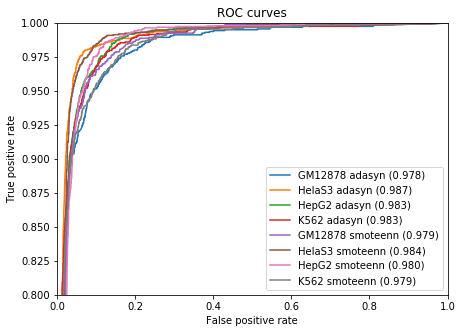

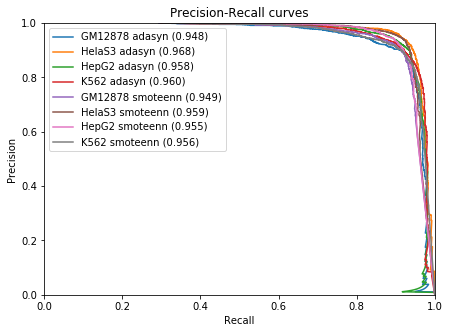

In [5]:
roc(results, 'AX-IX_2layers_150_roc.pdf')
pr(results, 'AX-IX_2layers_150_pr.pdf')

### Adasyn accuracy

In [6]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-X","I-X"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-X       I-X
GM12878  0.928401  0.935905  0.925272
HelaS3   0.958006  0.961373  0.956571
HepG2    0.933115  0.960330  0.919430
K562     0.938215  0.941769  0.936656

### SMOTEENN accuracy

In [7]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-X","I-X"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-X       I-X
GM12878  0.917231  0.965775  0.896990
HelaS3   0.939253  0.974785  0.924114
HepG2    0.936735  0.958269  0.925907
K562     0.895375  0.967525  0.863737

## Benchmarks with the first MLP (4 layers (64, 128, 128, 64))

In [8]:
import matplotlib.pyplot as plt

history = [[] for i in range(4)]
y_pred_adasyn = [[] for i in range(4)]
y_pred_smoteenn = [[] for i in range(4)]
scores_adasyn = [[] for i in range(4)]
scores_smoteenn = [[] for i in range(4)]

inputs = [101, 74, 72, 135]
names = ["GM12878", "HelaS3", "HepG2", "K562"]

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_adasyn[i], y_train_adasyn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_adasyn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_adasyn[i] = (total, one, zero)

for i in range(4):
    model = dense2(inputs[i])
    history[i] = model.fit(X_train_smoteenn[i], y_train_smoteenn[i], epochs=150, batch_size=128, validation_data=(X_val[i], y_val[i]), verbose=1)
    y_pred_smoteenn[i] = model.predict(X_test[i])
    
    nl = list(zip(X_test[i], y_test[i]))
    zerox, zeroy = zip(*[(x,y) for (x,y) in nl if y == 0])
    onex, oney  = zip(*[(x,y) for (x,y) in nl if y == 1])
    
    total = model.evaluate(X_test[i], y_test[i], batch_size=32, verbose=0)
    zero = model.evaluate(np.array(zerox), np.array(zeroy), batch_size=32, verbose=0)
    one = model.evaluate(np.array(onex), np.array(oney), batch_size=32, verbose=0)
    scores_smoteenn[i] = (total, one, zero)
    
results_adasyn = [(names[i] + ' adasyn', y_test[i], y_pred_adasyn[i]) for i in range(4)]
results_smoteenn = [(names[i] + ' smoteenn', y_test[i], y_pred_smoteenn[i]) for i in range(4)]
results = results_adasyn + results_smoteenn

...building the mlp...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                6528      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

24579/24579 [==============================] - 1s 24us/step - loss: 0.1861 - acc: 0.9303 - auc_acc: 0.9676 - f1_acc: 0.9320 - precision_acc: 0.9120 - recall_acc: 0.9539 - val_loss: 0.1885 - val_acc: 0.9254 - val_auc_acc: 0.9677 - val_f1_acc: 0.8817 - val_precision_acc: 0.8269 - val_recall_acc: 0.9478
Epoch 49/150
24579/24579 [==============================] - 1s 24us/step - loss: 0.1860 - acc: 0.9305 - auc_acc: 0.9678 - f1_acc: 0.9324 - precision_acc: 0.9131 - recall_acc: 0.9535 - val_loss: 0.2106 - val_acc: 0.9181 - val_auc_acc: 0.9679 - val_f1_acc: 0.8727 - val_precision_acc: 0.8002 - val_recall_acc: 0.9625
Epoch 50/150
24579/24579 [==============================] - 1s 27us/step - loss: 0.1824 - acc: 0.9317 - auc_acc: 0.9680 - f1_acc: 0.9335 - precision_acc: 0.9128 - recall_acc: 0.9559 - val_loss: 0.1836 - val_acc: 0.9279 - val_auc_acc: 0.9681 - val_f1_acc: 0.8854 - val_precision_acc: 0.8322 - val_recall_acc: 0.9492
Epoch 51/150
24579/24579 [==============================] - 1s 21us/

24579/24579 [==============================] - 1s 23us/step - loss: 0.1421 - acc: 0.9476 - auc_acc: 0.9748 - f1_acc: 0.9487 - precision_acc: 0.9306 - recall_acc: 0.9685 - val_loss: 0.2022 - val_acc: 0.9261 - val_auc_acc: 0.9748 - val_f1_acc: 0.8832 - val_precision_acc: 0.8248 - val_recall_acc: 0.9536
Epoch 101/150
24579/24579 [==============================] - 1s 25us/step - loss: 0.1408 - acc: 0.9479 - auc_acc: 0.9749 - f1_acc: 0.9496 - precision_acc: 0.9271 - recall_acc: 0.9738 - val_loss: 0.1894 - val_acc: 0.9295 - val_auc_acc: 0.9749 - val_f1_acc: 0.8871 - val_precision_acc: 0.8367 - val_recall_acc: 0.9467
Epoch 102/150
24579/24579 [==============================] - 1s 24us/step - loss: 0.1405 - acc: 0.9475 - auc_acc: 0.9750 - f1_acc: 0.9490 - precision_acc: 0.9288 - recall_acc: 0.9709 - val_loss: 0.1936 - val_acc: 0.9284 - val_auc_acc: 0.9750 - val_f1_acc: 0.8863 - val_precision_acc: 0.8299 - val_recall_acc: 0.9536
Epoch 103/150
24579/24579 [==============================] - 1s 22

Epoch 126/150
24579/24579 [==============================] - 1s 23us/step - loss: 0.1247 - acc: 0.9547 - auc_acc: 0.9770 - f1_acc: 0.9557 - precision_acc: 0.9348 - recall_acc: 0.9783 - val_loss: 0.1908 - val_acc: 0.9377 - val_auc_acc: 0.9771 - val_f1_acc: 0.8972 - val_precision_acc: 0.8653 - val_recall_acc: 0.9350
Epoch 127/150
24579/24579 [==============================] - 0s 19us/step - loss: 0.1233 - acc: 0.9539 - auc_acc: 0.9771 - f1_acc: 0.9551 - precision_acc: 0.9366 - recall_acc: 0.9750 - val_loss: 0.1942 - val_acc: 0.9318 - val_auc_acc: 0.9771 - val_f1_acc: 0.8890 - val_precision_acc: 0.8491 - val_recall_acc: 0.9358
Epoch 128/150
24579/24579 [==============================] - 0s 20us/step - loss: 0.1209 - acc: 0.9554 - auc_acc: 0.9772 - f1_acc: 0.9567 - precision_acc: 0.9361 - recall_acc: 0.9787 - val_loss: 0.1996 - val_acc: 0.9302 - val_auc_acc: 0.9772 - val_f1_acc: 0.8873 - val_precision_acc: 0.8428 - val_recall_acc: 0.9395
Epoch 129/150
24579/24579 [=========================

Train on 28699 samples, validate on 4991 samples
Epoch 1/150
28699/28699 [==============================] - 1s 52us/step - loss: 0.6396 - acc: 0.6830 - auc_acc: 0.6758 - f1_acc: 0.6965 - precision_acc: 0.6830 - recall_acc: 0.7234 - val_loss: 0.5251 - val_acc: 0.8732 - val_auc_acc: 0.7704 - val_f1_acc: 0.7989 - val_precision_acc: 0.7394 - val_recall_acc: 0.8711
Epoch 2/150
28699/28699 [==============================] - 1s 22us/step - loss: 0.4757 - acc: 0.8296 - auc_acc: 0.8178 - f1_acc: 0.8281 - precision_acc: 0.8414 - recall_acc: 0.8189 - val_loss: 0.3466 - val_acc: 0.9084 - val_auc_acc: 0.8515 - val_f1_acc: 0.8576 - val_precision_acc: 0.7796 - val_recall_acc: 0.9561
Epoch 3/150
28699/28699 [==============================] - 1s 22us/step - loss: 0.3386 - acc: 0.8891 - auc_acc: 0.8742 - f1_acc: 0.8887 - precision_acc: 0.8954 - recall_acc: 0.8838 - val_loss: 0.2311 - val_acc: 0.9431 - val_auc_acc: 0.8925 - val_f1_acc: 0.9061 - val_precision_acc: 0.8649 - val_recall_acc: 0.9534
Epoch 4/1

Epoch 27/150
28699/28699 [==============================] - 1s 20us/step - loss: 0.1529 - acc: 0.9493 - auc_acc: 0.9737 - f1_acc: 0.9500 - precision_acc: 0.9438 - recall_acc: 0.9572 - val_loss: 0.1367 - val_acc: 0.9565 - val_auc_acc: 0.9739 - val_f1_acc: 0.9274 - val_precision_acc: 0.8878 - val_recall_acc: 0.9726
Epoch 28/150
28699/28699 [==============================] - 1s 20us/step - loss: 0.1508 - acc: 0.9498 - auc_acc: 0.9741 - f1_acc: 0.9504 - precision_acc: 0.9446 - recall_acc: 0.9569 - val_loss: 0.1712 - val_acc: 0.9409 - val_auc_acc: 0.9743 - val_f1_acc: 0.8965 - val_precision_acc: 0.8996 - val_recall_acc: 0.8956
Epoch 29/150
28699/28699 [==============================] - 1s 19us/step - loss: 0.1522 - acc: 0.9500 - auc_acc: 0.9745 - f1_acc: 0.9505 - precision_acc: 0.9450 - recall_acc: 0.9568 - val_loss: 0.1411 - val_acc: 0.9529 - val_auc_acc: 0.9746 - val_f1_acc: 0.9217 - val_precision_acc: 0.8762 - val_recall_acc: 0.9743
Epoch 30/150
28699/28699 [=============================

28699/28699 [==============================] - 1s 21us/step - loss: 0.1326 - acc: 0.9557 - auc_acc: 0.9797 - f1_acc: 0.9563 - precision_acc: 0.9473 - recall_acc: 0.9661 - val_loss: 0.1317 - val_acc: 0.9537 - val_auc_acc: 0.9798 - val_f1_acc: 0.9226 - val_precision_acc: 0.8829 - val_recall_acc: 0.9680
Epoch 54/150
28699/28699 [==============================] - 1s 22us/step - loss: 0.1317 - acc: 0.9565 - auc_acc: 0.9798 - f1_acc: 0.9570 - precision_acc: 0.9487 - recall_acc: 0.9661 - val_loss: 0.1318 - val_acc: 0.9537 - val_auc_acc: 0.9799 - val_f1_acc: 0.9225 - val_precision_acc: 0.8820 - val_recall_acc: 0.9684
Epoch 55/150
28699/28699 [==============================] - 1s 23us/step - loss: 0.1324 - acc: 0.9573 - auc_acc: 0.9800 - f1_acc: 0.9581 - precision_acc: 0.9499 - recall_acc: 0.9670 - val_loss: 0.1323 - val_acc: 0.9539 - val_auc_acc: 0.9800 - val_f1_acc: 0.9226 - val_precision_acc: 0.8828 - val_recall_acc: 0.9677
Epoch 56/150
28699/28699 [==============================] - 1s 20us/

28699/28699 [==============================] - 1s 20us/step - loss: 0.1039 - acc: 0.9667 - auc_acc: 0.9843 - f1_acc: 0.9672 - precision_acc: 0.9552 - recall_acc: 0.9801 - val_loss: 0.1277 - val_acc: 0.9595 - val_auc_acc: 0.9843 - val_f1_acc: 0.9321 - val_precision_acc: 0.9033 - val_recall_acc: 0.9643
Epoch 106/150
28699/28699 [==============================] - 1s 20us/step - loss: 0.1041 - acc: 0.9678 - auc_acc: 0.9843 - f1_acc: 0.9685 - precision_acc: 0.9570 - recall_acc: 0.9808 - val_loss: 0.1281 - val_acc: 0.9611 - val_auc_acc: 0.9844 - val_f1_acc: 0.9343 - val_precision_acc: 0.9096 - val_recall_acc: 0.9623
Epoch 107/150
28699/28699 [==============================] - 1s 20us/step - loss: 0.1026 - acc: 0.9676 - auc_acc: 0.9844 - f1_acc: 0.9682 - precision_acc: 0.9568 - recall_acc: 0.9803 - val_loss: 0.1294 - val_acc: 0.9561 - val_auc_acc: 0.9844 - val_f1_acc: 0.9270 - val_precision_acc: 0.8910 - val_recall_acc: 0.9680
Epoch 108/150
28699/28699 [==============================] - 1s 22

Epoch 131/150
28699/28699 [==============================] - 1s 25us/step - loss: 0.0948 - acc: 0.9705 - auc_acc: 0.9856 - f1_acc: 0.9710 - precision_acc: 0.9585 - recall_acc: 0.9844 - val_loss: 0.1392 - val_acc: 0.9565 - val_auc_acc: 0.9856 - val_f1_acc: 0.9279 - val_precision_acc: 0.8895 - val_recall_acc: 0.9716
Epoch 132/150
28699/28699 [==============================] - 1s 21us/step - loss: 0.0940 - acc: 0.9706 - auc_acc: 0.9856 - f1_acc: 0.9712 - precision_acc: 0.9589 - recall_acc: 0.9843 - val_loss: 0.1252 - val_acc: 0.9619 - val_auc_acc: 0.9856 - val_f1_acc: 0.9358 - val_precision_acc: 0.9137 - val_recall_acc: 0.9604
Epoch 133/150
28699/28699 [==============================] - 1s 24us/step - loss: 0.0930 - acc: 0.9703 - auc_acc: 0.9857 - f1_acc: 0.9709 - precision_acc: 0.9585 - recall_acc: 0.9841 - val_loss: 0.1315 - val_acc: 0.9589 - val_auc_acc: 0.9857 - val_f1_acc: 0.9315 - val_precision_acc: 0.8971 - val_recall_acc: 0.9701
Epoch 134/150
28699/28699 [=========================

24082/24082 [==============================] - 0s 20us/step - loss: 0.2083 - acc: 0.9207 - auc_acc: 0.9634 - f1_acc: 0.9216 - precision_acc: 0.8937 - recall_acc: 0.9524 - val_loss: 0.1872 - val_acc: 0.9229 - val_auc_acc: 0.9635 - val_f1_acc: 0.8954 - val_precision_acc: 0.8313 - val_recall_acc: 0.9722
Epoch 29/150
24082/24082 [==============================] - 0s 19us/step - loss: 0.2091 - acc: 0.9222 - auc_acc: 0.9637 - f1_acc: 0.9233 - precision_acc: 0.8953 - recall_acc: 0.9543 - val_loss: 0.1846 - val_acc: 0.9242 - val_auc_acc: 0.9638 - val_f1_acc: 0.8972 - val_precision_acc: 0.8339 - val_recall_acc: 0.9730
Epoch 30/150
24082/24082 [==============================] - 1s 21us/step - loss: 0.2075 - acc: 0.9207 - auc_acc: 0.9640 - f1_acc: 0.9221 - precision_acc: 0.8939 - recall_acc: 0.9534 - val_loss: 0.1834 - val_acc: 0.9233 - val_auc_acc: 0.9641 - val_f1_acc: 0.8958 - val_precision_acc: 0.8330 - val_recall_acc: 0.9709
Epoch 31/150
24082/24082 [==============================] - 0s 20us/

24082/24082 [==============================] - 1s 22us/step - loss: 0.1753 - acc: 0.9321 - auc_acc: 0.9712 - f1_acc: 0.9324 - precision_acc: 0.9113 - recall_acc: 0.9555 - val_loss: 0.1771 - val_acc: 0.9321 - val_auc_acc: 0.9712 - val_f1_acc: 0.9064 - val_precision_acc: 0.8544 - val_recall_acc: 0.9675
Epoch 81/150
24082/24082 [==============================] - 1s 23us/step - loss: 0.1749 - acc: 0.9321 - auc_acc: 0.9712 - f1_acc: 0.9321 - precision_acc: 0.9120 - recall_acc: 0.9541 - val_loss: 0.1830 - val_acc: 0.9289 - val_auc_acc: 0.9713 - val_f1_acc: 0.9027 - val_precision_acc: 0.8450 - val_recall_acc: 0.9713
Epoch 82/150
24082/24082 [==============================] - 0s 20us/step - loss: 0.1750 - acc: 0.9331 - auc_acc: 0.9713 - f1_acc: 0.9332 - precision_acc: 0.9109 - recall_acc: 0.9576 - val_loss: 0.1778 - val_acc: 0.9328 - val_auc_acc: 0.9714 - val_f1_acc: 0.9071 - val_precision_acc: 0.8565 - val_recall_acc: 0.9662
Epoch 83/150
24082/24082 [==============================] - 1s 22us/

24082/24082 [==============================] - 1s 22us/step - loss: 0.1636 - acc: 0.9376 - auc_acc: 0.9731 - f1_acc: 0.9379 - precision_acc: 0.9162 - recall_acc: 0.9618 - val_loss: 0.1795 - val_acc: 0.9339 - val_auc_acc: 0.9731 - val_f1_acc: 0.9082 - val_precision_acc: 0.8620 - val_recall_acc: 0.9620
Epoch 107/150
24082/24082 [==============================] - 0s 21us/step - loss: 0.1641 - acc: 0.9378 - auc_acc: 0.9732 - f1_acc: 0.9382 - precision_acc: 0.9168 - recall_acc: 0.9615 - val_loss: 0.1823 - val_acc: 0.9295 - val_auc_acc: 0.9732 - val_f1_acc: 0.9031 - val_precision_acc: 0.8502 - val_recall_acc: 0.9651
Epoch 108/150
24082/24082 [==============================] - 1s 22us/step - loss: 0.1636 - acc: 0.9368 - auc_acc: 0.9732 - f1_acc: 0.9373 - precision_acc: 0.9149 - recall_acc: 0.9617 - val_loss: 0.1829 - val_acc: 0.9293 - val_auc_acc: 0.9733 - val_f1_acc: 0.9031 - val_precision_acc: 0.8487 - val_recall_acc: 0.9672
Epoch 109/150
24082/24082 [==============================] - 1s 27

Epoch 132/150
24082/24082 [==============================] - 0s 19us/step - loss: 0.1532 - acc: 0.9406 - auc_acc: 0.9747 - f1_acc: 0.9409 - precision_acc: 0.9199 - recall_acc: 0.9637 - val_loss: 0.1898 - val_acc: 0.9304 - val_auc_acc: 0.9747 - val_f1_acc: 0.9040 - val_precision_acc: 0.8525 - val_recall_acc: 0.9644
Epoch 133/150
24082/24082 [==============================] - 1s 23us/step - loss: 0.1518 - acc: 0.9410 - auc_acc: 0.9747 - f1_acc: 0.9412 - precision_acc: 0.9199 - recall_acc: 0.9645 - val_loss: 0.1888 - val_acc: 0.9274 - val_auc_acc: 0.9747 - val_f1_acc: 0.9003 - val_precision_acc: 0.8441 - val_recall_acc: 0.9668
Epoch 134/150
24082/24082 [==============================] - 0s 20us/step - loss: 0.1547 - acc: 0.9402 - auc_acc: 0.9748 - f1_acc: 0.9407 - precision_acc: 0.9183 - recall_acc: 0.9651 - val_loss: 0.1852 - val_acc: 0.9323 - val_auc_acc: 0.9748 - val_f1_acc: 0.9064 - val_precision_acc: 0.8582 - val_recall_acc: 0.9625
Epoch 135/150
24082/24082 [=========================

25256/25256 [==============================] - 1s 24us/step - loss: 0.1791 - acc: 0.9361 - auc_acc: 0.9665 - f1_acc: 0.9352 - precision_acc: 0.9177 - recall_acc: 0.9546 - val_loss: 0.1771 - val_acc: 0.9300 - val_auc_acc: 0.9667 - val_f1_acc: 0.8931 - val_precision_acc: 0.8295 - val_recall_acc: 0.9696
Epoch 30/150
25256/25256 [==============================] - 1s 22us/step - loss: 0.1805 - acc: 0.9344 - auc_acc: 0.9669 - f1_acc: 0.9335 - precision_acc: 0.9163 - recall_acc: 0.9522 - val_loss: 0.1762 - val_acc: 0.9304 - val_auc_acc: 0.9671 - val_f1_acc: 0.8935 - val_precision_acc: 0.8304 - val_recall_acc: 0.9695
Epoch 31/150
25256/25256 [==============================] - 1s 21us/step - loss: 0.1777 - acc: 0.9376 - auc_acc: 0.9673 - f1_acc: 0.9367 - precision_acc: 0.9204 - recall_acc: 0.9546 - val_loss: 0.1759 - val_acc: 0.9311 - val_auc_acc: 0.9675 - val_f1_acc: 0.8943 - val_precision_acc: 0.8324 - val_recall_acc: 0.9684
Epoch 32/150
25256/25256 [==============================] - 1s 23us/

25256/25256 [==============================] - 1s 22us/step - loss: 0.1344 - acc: 0.9520 - auc_acc: 0.9774 - f1_acc: 0.9510 - precision_acc: 0.9366 - recall_acc: 0.9668 - val_loss: 0.1806 - val_acc: 0.9330 - val_auc_acc: 0.9774 - val_f1_acc: 0.8957 - val_precision_acc: 0.8443 - val_recall_acc: 0.9557
Epoch 82/150
25256/25256 [==============================] - 1s 27us/step - loss: 0.1333 - acc: 0.9526 - auc_acc: 0.9775 - f1_acc: 0.9517 - precision_acc: 0.9375 - recall_acc: 0.9669 - val_loss: 0.1812 - val_acc: 0.9339 - val_auc_acc: 0.9775 - val_f1_acc: 0.8967 - val_precision_acc: 0.8487 - val_recall_acc: 0.9524
Epoch 83/150
25256/25256 [==============================] - 1s 22us/step - loss: 0.1331 - acc: 0.9533 - auc_acc: 0.9776 - f1_acc: 0.9527 - precision_acc: 0.9371 - recall_acc: 0.9695 - val_loss: 0.1779 - val_acc: 0.9349 - val_auc_acc: 0.9776 - val_f1_acc: 0.8979 - val_precision_acc: 0.8525 - val_recall_acc: 0.9503
Epoch 84/150
25256/25256 [==============================] - 1s 25us/

25256/25256 [==============================] - 1s 25us/step - loss: 0.1152 - acc: 0.9602 - auc_acc: 0.9798 - f1_acc: 0.9594 - precision_acc: 0.9453 - recall_acc: 0.9746 - val_loss: 0.1919 - val_acc: 0.9354 - val_auc_acc: 0.9799 - val_f1_acc: 0.8976 - val_precision_acc: 0.8555 - val_recall_acc: 0.9460
Epoch 108/150
25256/25256 [==============================] - 1s 21us/step - loss: 0.1164 - acc: 0.9599 - auc_acc: 0.9799 - f1_acc: 0.9593 - precision_acc: 0.9456 - recall_acc: 0.9742 - val_loss: 0.1898 - val_acc: 0.9373 - val_auc_acc: 0.9799 - val_f1_acc: 0.9004 - val_precision_acc: 0.8615 - val_recall_acc: 0.9447
Epoch 109/150
25256/25256 [==============================] - 1s 22us/step - loss: 0.1152 - acc: 0.9594 - auc_acc: 0.9800 - f1_acc: 0.9587 - precision_acc: 0.9449 - recall_acc: 0.9735 - val_loss: 0.1887 - val_acc: 0.9362 - val_auc_acc: 0.9800 - val_f1_acc: 0.8987 - val_precision_acc: 0.8567 - val_recall_acc: 0.9471
Epoch 110/150
25256/25256 [==============================] - 1s 22

Epoch 133/150
25256/25256 [==============================] - 1s 26us/step - loss: 0.0972 - acc: 0.9681 - auc_acc: 0.9817 - f1_acc: 0.9674 - precision_acc: 0.9541 - recall_acc: 0.9817 - val_loss: 0.2036 - val_acc: 0.9360 - val_auc_acc: 0.9817 - val_f1_acc: 0.8984 - val_precision_acc: 0.8597 - val_recall_acc: 0.9427
Epoch 134/150
25256/25256 [==============================] - 1s 25us/step - loss: 0.0973 - acc: 0.9681 - auc_acc: 0.9818 - f1_acc: 0.9675 - precision_acc: 0.9545 - recall_acc: 0.9815 - val_loss: 0.2086 - val_acc: 0.9339 - val_auc_acc: 0.9818 - val_f1_acc: 0.8954 - val_precision_acc: 0.8528 - val_recall_acc: 0.9446
Epoch 135/150
25256/25256 [==============================] - 1s 25us/step - loss: 0.0982 - acc: 0.9673 - auc_acc: 0.9818 - f1_acc: 0.9666 - precision_acc: 0.9542 - recall_acc: 0.9799 - val_loss: 0.2065 - val_acc: 0.9345 - val_auc_acc: 0.9819 - val_f1_acc: 0.8961 - val_precision_acc: 0.8558 - val_recall_acc: 0.9426
Epoch 136/150
25256/25256 [=========================

19267/19267 [==============================] - 0s 24us/step - loss: 0.0469 - acc: 0.9831 - auc_acc: 0.9885 - f1_acc: 0.9857 - precision_acc: 0.9902 - recall_acc: 0.9815 - val_loss: 0.4354 - val_acc: 0.9194 - val_auc_acc: 0.9886 - val_f1_acc: 0.8749 - val_precision_acc: 0.8067 - val_recall_acc: 0.9582
Epoch 31/150
19267/19267 [==============================] - 0s 25us/step - loss: 0.0467 - acc: 0.9826 - auc_acc: 0.9886 - f1_acc: 0.9853 - precision_acc: 0.9892 - recall_acc: 0.9817 - val_loss: 0.4143 - val_acc: 0.9217 - val_auc_acc: 0.9887 - val_f1_acc: 0.8774 - val_precision_acc: 0.8150 - val_recall_acc: 0.9525
Epoch 32/150
19267/19267 [==============================] - 0s 23us/step - loss: 0.0456 - acc: 0.9832 - auc_acc: 0.9887 - f1_acc: 0.9860 - precision_acc: 0.9906 - recall_acc: 0.9816 - val_loss: 0.4274 - val_acc: 0.9210 - val_auc_acc: 0.9888 - val_f1_acc: 0.8768 - val_precision_acc: 0.8123 - val_recall_acc: 0.9550
Epoch 33/150
19267/19267 [==============================] - 0s 25us/

19267/19267 [==============================] - 0s 25us/step - loss: 0.0349 - acc: 0.9862 - auc_acc: 0.9906 - f1_acc: 0.9885 - precision_acc: 0.9907 - recall_acc: 0.9865 - val_loss: 0.4776 - val_acc: 0.9185 - val_auc_acc: 0.9906 - val_f1_acc: 0.8734 - val_precision_acc: 0.8037 - val_recall_acc: 0.9588
Epoch 83/150
19267/19267 [==============================] - 1s 26us/step - loss: 0.0336 - acc: 0.9866 - auc_acc: 0.9906 - f1_acc: 0.9887 - precision_acc: 0.9918 - recall_acc: 0.9857 - val_loss: 0.4796 - val_acc: 0.9190 - val_auc_acc: 0.9906 - val_f1_acc: 0.8742 - val_precision_acc: 0.8044 - val_recall_acc: 0.9596
Epoch 84/150
19267/19267 [==============================] - 1s 27us/step - loss: 0.0332 - acc: 0.9867 - auc_acc: 0.9906 - f1_acc: 0.9890 - precision_acc: 0.9907 - recall_acc: 0.9874 - val_loss: 0.4869 - val_acc: 0.9171 - val_auc_acc: 0.9907 - val_f1_acc: 0.8718 - val_precision_acc: 0.8010 - val_recall_acc: 0.9588
Epoch 85/150
19267/19267 [==============================] - 1s 26us/

19267/19267 [==============================] - 0s 22us/step - loss: 0.0297 - acc: 0.9875 - auc_acc: 0.9909 - f1_acc: 0.9895 - precision_acc: 0.9916 - recall_acc: 0.9875 - val_loss: 0.4866 - val_acc: 0.9174 - val_auc_acc: 0.9909 - val_f1_acc: 0.8716 - val_precision_acc: 0.8025 - val_recall_acc: 0.9563
Epoch 109/150
19267/19267 [==============================] - 0s 24us/step - loss: 0.0305 - acc: 0.9880 - auc_acc: 0.9909 - f1_acc: 0.9899 - precision_acc: 0.9922 - recall_acc: 0.9877 - val_loss: 0.4893 - val_acc: 0.9169 - val_auc_acc: 0.9909 - val_f1_acc: 0.8712 - val_precision_acc: 0.8013 - val_recall_acc: 0.9571
Epoch 110/150
19267/19267 [==============================] - 0s 21us/step - loss: 0.0307 - acc: 0.9880 - auc_acc: 0.9909 - f1_acc: 0.9899 - precision_acc: 0.9918 - recall_acc: 0.9881 - val_loss: 0.4941 - val_acc: 0.9167 - val_auc_acc: 0.9909 - val_f1_acc: 0.8708 - val_precision_acc: 0.8011 - val_recall_acc: 0.9563
Epoch 111/150
19267/19267 [==============================] - 0s 23

Epoch 134/150
19267/19267 [==============================] - 0s 26us/step - loss: 0.0273 - acc: 0.9890 - auc_acc: 0.9911 - f1_acc: 0.9908 - precision_acc: 0.9923 - recall_acc: 0.9895 - val_loss: 0.4846 - val_acc: 0.9197 - val_auc_acc: 0.9911 - val_f1_acc: 0.8742 - val_precision_acc: 0.8099 - val_recall_acc: 0.9520
Epoch 135/150
19267/19267 [==============================] - 0s 26us/step - loss: 0.0275 - acc: 0.9890 - auc_acc: 0.9911 - f1_acc: 0.9908 - precision_acc: 0.9927 - recall_acc: 0.9891 - val_loss: 0.4939 - val_acc: 0.9194 - val_auc_acc: 0.9911 - val_f1_acc: 0.8744 - val_precision_acc: 0.8076 - val_recall_acc: 0.9556
Epoch 136/150
19267/19267 [==============================] - 0s 24us/step - loss: 0.0273 - acc: 0.9890 - auc_acc: 0.9911 - f1_acc: 0.9908 - precision_acc: 0.9923 - recall_acc: 0.9894 - val_loss: 0.5089 - val_acc: 0.9162 - val_auc_acc: 0.9911 - val_f1_acc: 0.8699 - val_precision_acc: 0.7999 - val_recall_acc: 0.9563
Epoch 137/150
19267/19267 [=========================

23389/23389 [==============================] - 0s 20us/step - loss: 0.0356 - acc: 0.9892 - auc_acc: 0.9912 - f1_acc: 0.9907 - precision_acc: 0.9933 - recall_acc: 0.9881 - val_loss: 0.2817 - val_acc: 0.9449 - val_auc_acc: 0.9912 - val_f1_acc: 0.9105 - val_precision_acc: 0.8547 - val_recall_acc: 0.9760
Epoch 32/150
23389/23389 [==============================] - 1s 28us/step - loss: 0.0386 - acc: 0.9889 - auc_acc: 0.9913 - f1_acc: 0.9904 - precision_acc: 0.9934 - recall_acc: 0.9874 - val_loss: 0.3038 - val_acc: 0.9387 - val_auc_acc: 0.9914 - val_f1_acc: 0.9015 - val_precision_acc: 0.8365 - val_recall_acc: 0.9797
Epoch 33/150
23389/23389 [==============================] - 1s 29us/step - loss: 0.0361 - acc: 0.9891 - auc_acc: 0.9914 - f1_acc: 0.9906 - precision_acc: 0.9928 - recall_acc: 0.9885 - val_loss: 0.2903 - val_acc: 0.9417 - val_auc_acc: 0.9915 - val_f1_acc: 0.9058 - val_precision_acc: 0.8458 - val_recall_acc: 0.9768
Epoch 34/150
23389/23389 [==============================] - 1s 31us/

23389/23389 [==============================] - 1s 24us/step - loss: 0.0252 - acc: 0.9923 - auc_acc: 0.9936 - f1_acc: 0.9934 - precision_acc: 0.9953 - recall_acc: 0.9915 - val_loss: 0.3061 - val_acc: 0.9407 - val_auc_acc: 0.9936 - val_f1_acc: 0.9046 - val_precision_acc: 0.8432 - val_recall_acc: 0.9776
Epoch 84/150
23389/23389 [==============================] - 1s 25us/step - loss: 0.0263 - acc: 0.9922 - auc_acc: 0.9936 - f1_acc: 0.9933 - precision_acc: 0.9952 - recall_acc: 0.9915 - val_loss: 0.3254 - val_acc: 0.9387 - val_auc_acc: 0.9936 - val_f1_acc: 0.9015 - val_precision_acc: 0.8368 - val_recall_acc: 0.9792
Epoch 85/150
23389/23389 [==============================] - 1s 27us/step - loss: 0.0256 - acc: 0.9921 - auc_acc: 0.9937 - f1_acc: 0.9932 - precision_acc: 0.9949 - recall_acc: 0.9916 - val_loss: 0.3069 - val_acc: 0.9421 - val_auc_acc: 0.9937 - val_f1_acc: 0.9063 - val_precision_acc: 0.8466 - val_recall_acc: 0.9768
Epoch 86/150
23389/23389 [==============================] - 1s 25us/

23389/23389 [==============================] - 1s 25us/step - loss: 0.0239 - acc: 0.9929 - auc_acc: 0.9940 - f1_acc: 0.9939 - precision_acc: 0.9958 - recall_acc: 0.9922 - val_loss: 0.3114 - val_acc: 0.9427 - val_auc_acc: 0.9940 - val_f1_acc: 0.9072 - val_precision_acc: 0.8478 - val_recall_acc: 0.9776
Epoch 110/150
23389/23389 [==============================] - 0s 20us/step - loss: 0.0224 - acc: 0.9931 - auc_acc: 0.9940 - f1_acc: 0.9940 - precision_acc: 0.9959 - recall_acc: 0.9922 - val_loss: 0.3110 - val_acc: 0.9429 - val_auc_acc: 0.9940 - val_f1_acc: 0.9077 - val_precision_acc: 0.8480 - val_recall_acc: 0.9785
Epoch 111/150
23389/23389 [==============================] - 0s 20us/step - loss: 0.0234 - acc: 0.9929 - auc_acc: 0.9940 - f1_acc: 0.9939 - precision_acc: 0.9956 - recall_acc: 0.9924 - val_loss: 0.2927 - val_acc: 0.9453 - val_auc_acc: 0.9940 - val_f1_acc: 0.9109 - val_precision_acc: 0.8547 - val_recall_acc: 0.9768
Epoch 112/150
23389/23389 [==============================] - 0s 21

Epoch 135/150
23389/23389 [==============================] - 0s 20us/step - loss: 0.0217 - acc: 0.9932 - auc_acc: 0.9942 - f1_acc: 0.9942 - precision_acc: 0.9956 - recall_acc: 0.9929 - val_loss: 0.3387 - val_acc: 0.9391 - val_auc_acc: 0.9942 - val_f1_acc: 0.9023 - val_precision_acc: 0.8374 - val_recall_acc: 0.9806
Epoch 136/150
23389/23389 [==============================] - 1s 23us/step - loss: 0.0207 - acc: 0.9933 - auc_acc: 0.9942 - f1_acc: 0.9942 - precision_acc: 0.9958 - recall_acc: 0.9926 - val_loss: 0.3278 - val_acc: 0.9419 - val_auc_acc: 0.9942 - val_f1_acc: 0.9060 - val_precision_acc: 0.8448 - val_recall_acc: 0.9790
Epoch 137/150
23389/23389 [==============================] - 1s 23us/step - loss: 0.0200 - acc: 0.9939 - auc_acc: 0.9942 - f1_acc: 0.9948 - precision_acc: 0.9964 - recall_acc: 0.9933 - val_loss: 0.3417 - val_acc: 0.9387 - val_auc_acc: 0.9942 - val_f1_acc: 0.9018 - val_precision_acc: 0.8363 - val_recall_acc: 0.9806
Epoch 138/150
23389/23389 [=========================

20566/20566 [==============================] - 1s 27us/step - loss: 0.0388 - acc: 0.9847 - auc_acc: 0.9914 - f1_acc: 0.9860 - precision_acc: 0.9897 - recall_acc: 0.9825 - val_loss: 0.3476 - val_acc: 0.9390 - val_auc_acc: 0.9914 - val_f1_acc: 0.9136 - val_precision_acc: 0.8860 - val_recall_acc: 0.9449
Epoch 33/150
20566/20566 [==============================] - 0s 22us/step - loss: 0.0410 - acc: 0.9843 - auc_acc: 0.9914 - f1_acc: 0.9855 - precision_acc: 0.9887 - recall_acc: 0.9826 - val_loss: 0.3600 - val_acc: 0.9384 - val_auc_acc: 0.9915 - val_f1_acc: 0.9132 - val_precision_acc: 0.8797 - val_recall_acc: 0.9514
Epoch 34/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0390 - acc: 0.9851 - auc_acc: 0.9915 - f1_acc: 0.9863 - precision_acc: 0.9899 - recall_acc: 0.9830 - val_loss: 0.3555 - val_acc: 0.9382 - val_auc_acc: 0.9915 - val_f1_acc: 0.9127 - val_precision_acc: 0.8815 - val_recall_acc: 0.9482
Epoch 35/150
20566/20566 [==============================] - 0s 22us/

20566/20566 [==============================] - 1s 25us/step - loss: 0.0306 - acc: 0.9876 - auc_acc: 0.9928 - f1_acc: 0.9886 - precision_acc: 0.9905 - recall_acc: 0.9870 - val_loss: 0.3663 - val_acc: 0.9362 - val_auc_acc: 0.9928 - val_f1_acc: 0.9100 - val_precision_acc: 0.8766 - val_recall_acc: 0.9479
Epoch 85/150
20566/20566 [==============================] - 0s 20us/step - loss: 0.0288 - acc: 0.9886 - auc_acc: 0.9928 - f1_acc: 0.9896 - precision_acc: 0.9916 - recall_acc: 0.9878 - val_loss: 0.3672 - val_acc: 0.9371 - val_auc_acc: 0.9928 - val_f1_acc: 0.9112 - val_precision_acc: 0.8786 - val_recall_acc: 0.9479
Epoch 86/150
20566/20566 [==============================] - 0s 24us/step - loss: 0.0288 - acc: 0.9885 - auc_acc: 0.9928 - f1_acc: 0.9896 - precision_acc: 0.9912 - recall_acc: 0.9881 - val_loss: 0.3736 - val_acc: 0.9367 - val_auc_acc: 0.9928 - val_f1_acc: 0.9108 - val_precision_acc: 0.8762 - val_recall_acc: 0.9501
Epoch 87/150
20566/20566 [==============================] - 1s 28us/

20566/20566 [==============================] - 0s 24us/step - loss: 0.0265 - acc: 0.9902 - auc_acc: 0.9930 - f1_acc: 0.9910 - precision_acc: 0.9923 - recall_acc: 0.9899 - val_loss: 0.3733 - val_acc: 0.9384 - val_auc_acc: 0.9930 - val_f1_acc: 0.9128 - val_precision_acc: 0.8816 - val_recall_acc: 0.9481
Epoch 111/150
20566/20566 [==============================] - 1s 28us/step - loss: 0.0278 - acc: 0.9893 - auc_acc: 0.9930 - f1_acc: 0.9903 - precision_acc: 0.9918 - recall_acc: 0.9888 - val_loss: 0.3756 - val_acc: 0.9384 - val_auc_acc: 0.9930 - val_f1_acc: 0.9129 - val_precision_acc: 0.8807 - val_recall_acc: 0.9494
Epoch 112/150
20566/20566 [==============================] - 1s 25us/step - loss: 0.0280 - acc: 0.9891 - auc_acc: 0.9930 - f1_acc: 0.9900 - precision_acc: 0.9917 - recall_acc: 0.9884 - val_loss: 0.3748 - val_acc: 0.9377 - val_auc_acc: 0.9930 - val_f1_acc: 0.9121 - val_precision_acc: 0.8797 - val_recall_acc: 0.9487
Epoch 113/150
20566/20566 [==============================] - 0s 18

Epoch 136/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0262 - acc: 0.9906 - auc_acc: 0.9931 - f1_acc: 0.9914 - precision_acc: 0.9930 - recall_acc: 0.9901 - val_loss: 0.3885 - val_acc: 0.9375 - val_auc_acc: 0.9931 - val_f1_acc: 0.9118 - val_precision_acc: 0.8787 - val_recall_acc: 0.9494
Epoch 137/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0267 - acc: 0.9893 - auc_acc: 0.9931 - f1_acc: 0.9902 - precision_acc: 0.9910 - recall_acc: 0.9895 - val_loss: 0.3768 - val_acc: 0.9399 - val_auc_acc: 0.9931 - val_f1_acc: 0.9149 - val_precision_acc: 0.8856 - val_recall_acc: 0.9481
Epoch 138/150
20566/20566 [==============================] - 0s 21us/step - loss: 0.0274 - acc: 0.9893 - auc_acc: 0.9931 - f1_acc: 0.9903 - precision_acc: 0.9920 - recall_acc: 0.9888 - val_loss: 0.3742 - val_acc: 0.9403 - val_auc_acc: 0.9931 - val_f1_acc: 0.9156 - val_precision_acc: 0.8862 - val_recall_acc: 0.9487
Epoch 139/150
20566/20566 [=========================

17780/17780 [==============================] - 0s 26us/step - loss: 0.0433 - acc: 0.9831 - auc_acc: 0.9831 - f1_acc: 0.9879 - precision_acc: 0.9869 - recall_acc: 0.9891 - val_loss: 0.5015 - val_acc: 0.8784 - val_auc_acc: 0.9832 - val_f1_acc: 0.8295 - val_precision_acc: 0.7216 - val_recall_acc: 0.9814
Epoch 34/150
17780/17780 [==============================] - 0s 26us/step - loss: 0.0415 - acc: 0.9831 - auc_acc: 0.9833 - f1_acc: 0.9880 - precision_acc: 0.9873 - recall_acc: 0.9889 - val_loss: 0.4801 - val_acc: 0.8861 - val_auc_acc: 0.9834 - val_f1_acc: 0.8383 - val_precision_acc: 0.7360 - val_recall_acc: 0.9790
Epoch 35/150
17780/17780 [==============================] - 0s 22us/step - loss: 0.0446 - acc: 0.9819 - auc_acc: 0.9834 - f1_acc: 0.9871 - precision_acc: 0.9868 - recall_acc: 0.9876 - val_loss: 0.5121 - val_acc: 0.8750 - val_auc_acc: 0.9835 - val_f1_acc: 0.8255 - val_precision_acc: 0.7164 - val_recall_acc: 0.9803
Epoch 36/150
17780/17780 [==============================] - 0s 23us/

17780/17780 [==============================] - 0s 24us/step - loss: 0.0292 - acc: 0.9888 - auc_acc: 0.9858 - f1_acc: 0.9920 - precision_acc: 0.9919 - recall_acc: 0.9922 - val_loss: 0.5776 - val_acc: 0.8820 - val_auc_acc: 0.9858 - val_f1_acc: 0.8336 - val_precision_acc: 0.7282 - val_recall_acc: 0.9799
Epoch 86/150
17780/17780 [==============================] - 1s 29us/step - loss: 0.0286 - acc: 0.9896 - auc_acc: 0.9858 - f1_acc: 0.9926 - precision_acc: 0.9928 - recall_acc: 0.9925 - val_loss: 0.6205 - val_acc: 0.8737 - val_auc_acc: 0.9858 - val_f1_acc: 0.8242 - val_precision_acc: 0.7141 - val_recall_acc: 0.9805
Epoch 87/150
17780/17780 [==============================] - 1s 29us/step - loss: 0.0283 - acc: 0.9889 - auc_acc: 0.9858 - f1_acc: 0.9920 - precision_acc: 0.9918 - recall_acc: 0.9923 - val_loss: 0.6127 - val_acc: 0.8756 - val_auc_acc: 0.9858 - val_f1_acc: 0.8263 - val_precision_acc: 0.7170 - val_recall_acc: 0.9812
Epoch 88/150
17780/17780 [==============================] - 1s 30us/

17780/17780 [==============================] - 0s 27us/step - loss: 0.0253 - acc: 0.9900 - auc_acc: 0.9859 - f1_acc: 0.9929 - precision_acc: 0.9931 - recall_acc: 0.9927 - val_loss: 0.5721 - val_acc: 0.8905 - val_auc_acc: 0.9859 - val_f1_acc: 0.8439 - val_precision_acc: 0.7442 - val_recall_acc: 0.9792
Epoch 112/150
17780/17780 [==============================] - 0s 28us/step - loss: 0.0237 - acc: 0.9922 - auc_acc: 0.9859 - f1_acc: 0.9944 - precision_acc: 0.9943 - recall_acc: 0.9945 - val_loss: 0.6257 - val_acc: 0.8816 - val_auc_acc: 0.9859 - val_f1_acc: 0.8329 - val_precision_acc: 0.7271 - val_recall_acc: 0.9804
Epoch 113/150
17780/17780 [==============================] - 0s 24us/step - loss: 0.0263 - acc: 0.9900 - auc_acc: 0.9859 - f1_acc: 0.9929 - precision_acc: 0.9927 - recall_acc: 0.9932 - val_loss: 0.5750 - val_acc: 0.8897 - val_auc_acc: 0.9859 - val_f1_acc: 0.8425 - val_precision_acc: 0.7435 - val_recall_acc: 0.9768
Epoch 114/150
17780/17780 [==============================] - 0s 27

Epoch 137/150
17780/17780 [==============================] - 0s 27us/step - loss: 0.0210 - acc: 0.9926 - auc_acc: 0.9859 - f1_acc: 0.9947 - precision_acc: 0.9945 - recall_acc: 0.9951 - val_loss: 0.6446 - val_acc: 0.8846 - val_auc_acc: 0.9859 - val_f1_acc: 0.8367 - val_precision_acc: 0.7328 - val_recall_acc: 0.9804
Epoch 138/150
17780/17780 [==============================] - 0s 28us/step - loss: 0.0216 - acc: 0.9922 - auc_acc: 0.9859 - f1_acc: 0.9945 - precision_acc: 0.9943 - recall_acc: 0.9948 - val_loss: 0.6489 - val_acc: 0.8854 - val_auc_acc: 0.9859 - val_f1_acc: 0.8376 - val_precision_acc: 0.7344 - val_recall_acc: 0.9804
Epoch 139/150
17780/17780 [==============================] - 0s 28us/step - loss: 0.0205 - acc: 0.9926 - auc_acc: 0.9859 - f1_acc: 0.9947 - precision_acc: 0.9946 - recall_acc: 0.9949 - val_loss: 0.6440 - val_acc: 0.8841 - val_auc_acc: 0.9859 - val_f1_acc: 0.8361 - val_precision_acc: 0.7320 - val_recall_acc: 0.9804
Epoch 140/150
17780/17780 [=========================

### ROC and PR curves

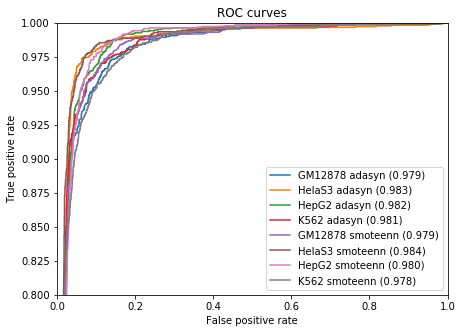

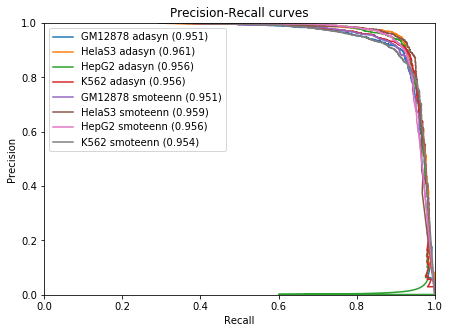

In [9]:
roc(results, 'AX-IX_4layers_150_roc.pdf')
pr(results, 'AX-IX_4layers_150_pr.pdf')

### Adasyn accuracy

In [10]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_adasyn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-X","I-X"])

print("Adasyn performance")
display(df)

Adasyn performance


Total       A-X       I-X
GM12878  0.926570  0.945240  0.918786
HelaS3   0.955922  0.959764  0.954286
HepG2    0.922082  0.969088  0.898446
K562     0.947090  0.926652  0.956052

### SMOTEENN accuracy

In [11]:
import pandas as pd

accuracy = [(tot[1], one[1], zero[1]) for (tot, one, zero) in scores_smoteenn]
df = pd.DataFrame(accuracy, ["GM12878", "HelaS3", "HepG2", "K562"], ["Total", "A-X","I-X"])

print("Smoteenn performance")
display(df)

Smoteenn performance


Total       A-X       I-X
GM12878  0.920161  0.962041  0.902698
HelaS3   0.941176  0.976395  0.926171
HepG2    0.935528  0.964451  0.920984
K562     0.887353  0.970325  0.850970